# imports

In [1]:
from itertools import count
from math import ceil, floor
import cv2
import os
import mediapipe as mp 
import shutil
import datetime
import time #to calculate frame per second 
import numpy as np
import pydot

# Both hands

In [17]:
const_inf = 100000000000000

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(126,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(126,const_inf)
    
    return np.concatenate([lh,rh])    


# path = "F:/captures/4th year thesis/datasets/Sign language/Videos"
path = "C:/Users/Raiyan/Desktop/training/Videos"

# out_path = "F:/captures/4th year thesis/datasets/Sign language/Frames"
out_path = "C:/Users/Raiyan/Desktop/training/Frames"

# point_out = "F:/captures/4th year thesis/datasets/Sign language/point data"
point_out = "C:/Users/Raiyan/Desktop/training/point data"

dir_list = os.listdir(path)

# print(dir_list)

for fol in dir_list:
    # print(fol)
    tem_path = path+"/"+fol
    tem_dir = os.listdir(tem_path)
    # print(tem_dir)
    for vid in tem_dir:
        # print(vid)
        vid_name = vid.split('.')
        child_folder = vid_name[0]
        # print(child_folder)
        
        out_folder = os.path.join(out_path,child_folder)
        
        point_out_folder = os.path.join(point_out,child_folder)
        
        # print(out_folder)
        
        if os.path.exists(out_folder):
            shutil.rmtree(out_folder)
            
        if os.path.exists(point_out_folder):
            shutil.rmtree(point_out_folder)
            
        os.mkdir(point_out_folder)
        
        os.mkdir(out_folder)
        
        vid_path = path+"/"+fol+"/"+vid
        
        # print(vid_path)
        
        cap = cv2.VideoCapture(vid_path)
        
        mpHands = mp.solutions.hands
        hands = mpHands.Hands()
        mpDraw = mp.solutions.drawing_utils
        
        prevTime = 0
        currTime = 0
        
        with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
            sequence = 0
            long_seq = 1000
            while (cap.isOpened()):
                
                # if cap.isOpened() == False : 
                #     break
                
                ret,frame = cap.read()
                
                if ret:
                
                    img, results = med_detect(frame,holistic)
                    
                    img = draw_lms(img,results)
                    
                    ts = (datetime.datetime.now())
                    
                    ts = str(ts.timestamp())
                    
                    keypoints = extract_key_points(results)
                    
                    if(len(keypoints)==126):
                    
                        # if sequence == 0:
                        #     print(keypoints)

                        np.save(os.path.join(point_out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),keypoints)

                        # sequence = sequence+1
                        # long_seq = long_seq+1

                        sq = str(sequence)

                        cv2. imwrite(os. path. join(out_folder
                                                    , child_folder+'_'+str(long_seq)+"_"+ts+sq+'.jpg'), img)

                        # cv2.imshow('Hand Gestures',img)

                        sequence = sequence+1
                        long_seq = long_seq+1
                    
                    if cv2.waitKey(1)==13 : 
                        break
                
                else:
                    break
            cap.release()
            cv2.destroyAllWindows()
        

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Raiyan/Desktop/training/Videos'

In [ ]:
print("Done")

# Interpolation


In [ ]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/point data"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"

# dir_list = os.listdir(path)

# print(dir_list)

# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
#     id = 0
#     lst=[]
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end")
#         for dt in data:
#             # print("St")
#             # print(dt)
#             # print("End")
#             if dt == const_inf:
#                 # print(dt)
#                 tf=0
#         if tf==1:
#             lst.append(id)
#         id=id+1
#     # print(fol)
#     # print(lst)
#     sequence = 0
#     long_seq=1000
#     expected_sq = 0
#     msd_lst = []
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end"
        
#         ext = 0
        
#         for item in lst:
#             if item==expected_sq:
#                 ext=1
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if ext==1:
        
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
            
#         if ext == 0:
#             msd_lst.append(expected_sq)
#             prev = -1
#             nxt = -1
#             x = len(lst)
#             for i in range(0,x-1):
#                 if expected_sq > lst[i] and expected_sq < lst[i+1]:
#                     prev = lst[i]
#                     nxt = lst[i+1]
#             # if nxt!=prev:
#             factor = (expected_sq-prev) / (nxt-prev)
            
#             pr_ar = np.full(126,const_inf)
            
#             nx_ar = np.full(126,const_inf)
            
#             for ld in tem_dir:
#                 # print(ld)
                
#                 splt_txt = ld.split("_")
                
#                 # print(splt_txt)
                
                
#                 # if pnt == 'shundor_1_1664389748.840814_14.npy':
#                 ld_str = str(tem_path)
#                 # print("EIJE")
#                 point_data_path_2 = ld_str+"/"+ld
#                 # print(point_data_path_2)
            
#                 data=np.load(point_data_path_2)
                
#                 # print("Start")
#                 # print(data[0])
#                 # print("End")
                
#                 # print(data)
                
#                 final_split = splt_txt[4].split(".")
                
#                 # print(type(final_split[0]))
                
#                 num = int(final_split[0])
                
#                 if num == prev:
#                     # print(prev)
#                     pr_ar = data
#                 if num == nxt:
#                     nx_ar = data
#                     # print(nxt)
                    
#             cur_ar = data
            
            
            
#             for i in range(0,126):
                
#                 cur_ar[i] = factor*(nx_ar[i]-pr_ar[i])
#                 # print(factor*(nx_ar[i]-pr_ar[i]))
#             data = cur_ar
            
#             # print("Start")
#             # print(cur_ar[0])
#             # print("End")
#             # print(cur_ar)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),cur_ar)
            
            
#             # print("Expexted: ", expected_sq)
#             # print("Pre ",prev,' ','next ', nxt)
            
            
        
#         # print(msd_lst)
        
#         long_seq = long_seq+1
        
#         sequence = sequence+1
        
#         expected_sq = expected_sq+1

In [ ]:
print("Done")

# Fixed


In [ ]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/fixed"

# dir_list = os.listdir(path)

# print(dir_list)



# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
    
#     count = 0
#     for pnt in tem_dir:
#         count = count+1
#     count = count/50
#     print(count)
    
#     id = count
#     sequence = 0
#     long_seq=1000
#     for iii in range(0,48):
#         # print(tem_dir[0])
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if id<=1:
#             # print()
#             point_data_path = tem_path+"/"+tem_dir[0]
#             data=np.load(point_data_path)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#             print(data)
            
#         else:
#             flr = floor(id)
#             cl = ceil(id)
            
#             if flr==cl:
            
#                 print("ST")
                
#                 print(flr)
                
#                 print(cl)
                
#                 print("EN")
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data=np.load(point_data_path)
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#                 print(data)
            
#             else:
#                 factor = (id-flr)/(cl-flr)
                
#                 point_data_path = tem_path+"/"+tem_dir[flr]
#                 data1=np.load(point_data_path)
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data2=np.load(point_data_path)
                
#                 data = data1
                
#                 for i in range(0,126):
#                     data[i] = factor*(data2[i]-data1[i])
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
                
#                 print(data)
            
        
        
        
#         sequence = sequence+1
#         long_seq = long_seq+1
#         id=id+count

In [ ]:
print("Done")

# Label and feature

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    axs[0].plot( history.history["categorical_accuracy"], label="train accuracy")
    axs[0].plot( history.history["val_categorical_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    axs[1].plot( history.history["loss"], label="train error")
    axs[1].plot( history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
#     axs[1].set_ylabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.savefig('accu-plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    

In [5]:
actions = np.array(['angti',
                    'bari',
                    'biman',
                    'biscuit',
                    'bondhu',
                    'camera',
                    'chosma',
                    'durgondho',
                    'goru',
                    'kalo',
                    'kharap',
                    'khata',
                    'kripon',
                    'kuli',
                    'mach',
                    'mangsho',
                    'naam',
                    'pakhi',
                    'pani', 
                    'rasta',
                    'shap',
                    'sheit',
                    'shikkhok',
                    'sundor',
                    'telephone',
                    'thelagari',
                    'valo'
                    ])

In [6]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'angti': 0,
 'bari': 1,
 'biman': 2,
 'biscuit': 3,
 'bondhu': 4,
 'camera': 5,
 'chosma': 6,
 'durgondho': 7,
 'goru': 8,
 'kalo': 9,
 'kharap': 10,
 'khata': 11,
 'kripon': 12,
 'kuli': 13,
 'mach': 14,
 'mangsho': 15,
 'naam': 16,
 'pakhi': 17,
 'pani': 18,
 'rasta': 19,
 'shap': 20,
 'sheit': 21,
 'shikkhok': 22,
 'sundor': 23,
 'telephone': 24,
 'thelagari': 25,
 'valo': 26}

In [7]:
# Thirty videos worth of data
# HOW MANY VIDEO FOR EACH ACTION ?????
no_sequences = 36

# HOW MANY FRAME WE TAKE FOR EACH VIDEO ?????
# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
# start_folder = 30

DATA_PATH = os.path.join('C:/Users/Raiyan/Desktop/trainingo')
ii = 0
sequences = [] 
labels = []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            
            # res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # res = np.load(os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{sequence_length}.npy'.format(frame_num)))
            # loaded_path = os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{frame_num}.npy')

            loaded_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            # print(frame_num)
            # print(loaded_path, frame_num)
            # print( np.array(np.load( loaded_path )).shape ) # gives (126,)
            res = np.load( loaded_path )
            # print(res)
            window.append(res)
            # print( np.array(window).shape )
        print( "." , end="") if np.array(window).shape == (10,420) else print( ii, 'bhul->', action, sequence, 'e', np.array(window).shape,'ashche')
        # print(sequence)
        ii = ii + 1
        sequences.append(window)
        labels.append(label_map[action])

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Raiyan/Desktop/trainingo\\shap\\0\\0.npy'

In [10]:
print(np.array(sequences).shape) # 90 ta item each having 10 vals
# print(np.array(labels).shape) # 90 ta item each having 10 vals
print(sequences[0:1])

(972, 10, 420)
[[array([0.04050874, 0.03768441, 0.07692064, 0.07981049, 0.10562124,
       0.10573193, 0.12903768, 0.12190472, 0.05117713, 0.07952429,
       0.06252935, 0.12548012, 0.06789224, 0.14878921, 0.07103122,
       0.16082852, 0.03472238, 0.06104976, 0.04888085, 0.11130811,
       0.05498294, 0.11691409, 0.05884423, 0.11011118, 0.04271654,
       0.05111019, 0.05847993, 0.08393623, 0.06437585, 0.08776693,
       0.06696705, 0.08343867, 0.06019911, 0.04920856, 0.07256989,
       0.06304   , 0.07654785, 0.06623662, 0.0786931 , 0.06349082,
       0.03649727, 0.04223679, 0.06525438, 0.06824535, 0.08882819,
       0.08457208, 0.02609383, 0.0486183 , 0.04071819, 0.09125515,
       0.04726896, 0.11373571, 0.05071077, 0.12533446, 0.0443723 ,
       0.04224987, 0.05761775, 0.07924418, 0.06173466, 0.08350552,
       0.06387256, 0.07666374, 0.07072682, 0.04781798, 0.08522292,
       0.05687695, 0.0900411 , 0.05554736, 0.09171568, 0.04927115,
       0.09350687, 0.05740335, 0.1045622 , 0.

In [75]:
# np.array(sequences).shape gives => (a, b, c) 
# meaning... total 'a' videos, 'b' frames each and each one having 'c' keypoints

print(np.array(sequences).shape) 


print(np.array(labels).shape)
X = np.array(sequences)
y = to_categorical(labels).astype( np.float32 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape)
print(y_test.shape)
# actions[np.argmax(y_test[4])]

(972, 10, 420)
(972,)
(972, 10, 420)
(195, 27)


# LSTM Model

In [8]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

# input shape = X.shape er last 2 ta value
# input_shape=( how many frames per prediction ?? , how many features ?? )

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,420)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [66]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# es = EarlyStopping(monitor='val_categorical_accuracy', mode='min', verbose=1)

In [67]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100)

Epoch 1/100
17/17 [==============================] - 8s 134ms/step - loss: 3.2882 - categorical_accuracy: 0.0442 - val_loss: 3.2726 - val_categorical_accuracy: 0.0739
Epoch 2/100
17/17 [==============================] - 1s 50ms/step - loss: 3.1685 - categorical_accuracy: 0.0808 - val_loss: 3.0549 - val_categorical_accuracy: 0.0856
Epoch 3/100
17/17 [==============================] - 1s 49ms/step - loss: 2.8254 - categorical_accuracy: 0.1692 - val_loss: 2.8809 - val_categorical_accuracy: 0.1440
Epoch 4/100
17/17 [==============================] - 1s 48ms/step - loss: 2.8409 - categorical_accuracy: 0.1923 - val_loss: 3.0277 - val_categorical_accuracy: 0.1245
Epoch 5/100
17/17 [==============================] - 1s 50ms/step - loss: 2.7800 - categorical_accuracy: 0.1962 - val_loss: 2.7486 - val_categorical_accuracy: 0.1868
Epoch 6/100
17/17 [==============================] - 1s 49ms/step - loss: 2.3931 - categorical_accuracy: 0.2692 - val_loss: 2.6037 - val_categorical_accuracy: 0.1712
Epo

17/17 [==============================] - 1s 45ms/step - loss: 0.2086 - categorical_accuracy: 0.9404 - val_loss: 0.2912 - val_categorical_accuracy: 0.9339
Epoch 100/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0749 - categorical_accuracy: 0.9846 - val_loss: 0.1843 - val_categorical_accuracy: 0.9650


In [57]:
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 64)            124160    
                                                                 
 lstm_13 (LSTM)              (None, 10, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 27)                891       
                                                                 
Total params: 279,515
Trainable params: 279,515
Non-tr

In [69]:
from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


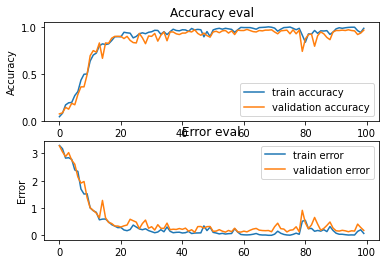

In [70]:
# print(history.params)
# print(model.metrics_names)
print(history.history.keys())
# print(history.history.values())
plot_history(history)


In [71]:
res = model.predict(X_test)

7/7 [==============================] - 1s 15ms/step


In [72]:
cnt=0
for indx in range(0,111):
    x=(actions[np.argmax(y_test[indx])])
    y=(actions[np.argmax(res[indx])])
    if(x!=y):
        print("does not match->",x,"&",y)
        cnt=cnt+1
print(cnt)

does not match-> kalo & mangsho
does not match-> pani & biscuit
does not match-> pani & biscuit
does not match-> kripon & mangsho
4


In [73]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

ypred = res

# converts the predictins from their one hot repr to categorical label
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()
# print(res) 

accuracy_score(ytrue, ypred)

# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

0.958974358974359

In [79]:
# KFOLD

from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils

# Define the X and y data
X = np.array(sequences)
y = to_categorical(labels).astype( np.float32 )

# Convert y to one-hot encoding
num_classes = np.unique(y).shape[0]
y = np_utils.to_categorical(y, num_classes)

# Define the number of folds for cross validation
k = 10

# Define the K-fold cross validation splits
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

# Initialize the list to store the accuracy scores for each fold
accuracy_scores = []

# Loop through each fold
for train, test in kfold.split(X, y):
    model = create_model()
    model.fit(X[train], y[train], epochs=50, batch_size=32, verbose=0)
    y_pred = model.predict_classes(X[test], verbose=0)
    accuracy = accuracy_score(y[test].argmax(axis=1), y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [63]:
# multilabel_confusion_matrix(ytrue, ypred)

In [68]:
# accuracy_score(ytrue, ypred)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrue,ypred)
# cm

<AxesSubplot:>

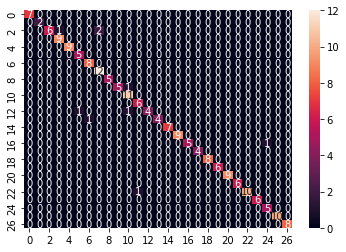

In [38]:
import seaborn as sns
sns.heatmap(cm,annot=True)

# sns.set_xlabel('X-Axis', fontsize=10)

In [39]:
model.save('signModel95_64.h5')
# del model

In [13]:
# model.load_weights('signModel95_64.h5')

model.load_weights('signModel_accu_95.89_all_class_64_ws21675286358.414752.h5')

In [10]:


from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ypred = model.predict(X_test)
res = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()


accuracy = accuracy_score(ytrue, ypred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# # calculate the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix: \n", conf_mat)

# calculate the classification report
class_rep = classification_report(ytrue, ypred)
print("Classification Report: \n", class_rep)

NameError: name 'X_test' is not defined

In [80]:
# demonstration of calculating metrics for a neural network model using sklearn
# from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from keras.models import Sequential
# from keras.layers import Dense


print("Precision Score : ", precision_score(ytrue, ypred, pos_label='positive', average='weighted'))
print("Recall Score : ", recall_score(ytrue, ypred, pos_label='positive', average='weighted'))
print("f1 Score : ", f1_score(ytrue, ypred, pos_label='positive', average='weighted'))

accuracy = accuracy_score(ytrue, ypred)
print('Accuracy: %f' % accuracy)

# # precision tp / (tp + fp)
# precision = precision_score(ytrue, ypred)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(ytrue, ypred)
# print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(ytrue, ypred)
# print('F1 score: %f' % f1)

Precision Score :  0.9678833986526293
Recall Score :  0.958974358974359
f1 Score :  0.9590349419308695
Accuracy: 0.958974


C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [22]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [23]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
# sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [25]:
# 1. New detection variables
const_inf = 100
 
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return np.concatenate([lh,rh]) 

def extract_key_points_left(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    
    return lh

def extract_key_points_right(result):
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return rh


def angle_between_vectors(u, v):
        """
        Args
            u, v: 3D vectors representing two connections
        Return
            Angle between the two vectors
        """
        if np.array_equal(u, v):
            return 0
        dot_product = np.dot(u, v)
        norm = np.linalg.norm(u) * np.linalg.norm(v)
        return np.arccos(dot_product / norm)
sequence = []
sentence = []
threshold = 0.8
ress =""

cap = cv2.VideoCapture(0)
vid_path="C:/Users/Raiyan/Desktop/valo_1.mp4"
# cap = cv2.VideoCapture(vid_path)
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
# Set mediapipe modelchkdsk /f c: 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = med_detect(frame,holistic)
        print(results)
        
        # Draw landmarks
        draw_lms(image, results)
        
        # 2. Prediction logic
        keypoints = extract_key_points(results)
                    
        l_k = extract_key_points_left(results)
                    
        r_k = extract_key_points_right(results)
                    
#                   print(len(l_k))
                    
        ar_l = []
                    
        p_i = 0
                    
        while p_i<61:
            ux = l_k[p_i]
            uy = l_k[p_i+1]
            uz = l_k[p_i+2]
            p_i+=3
            ar_l.append((ux,uy,uz))            
#                         print(p_i)
#                         print("done")
            
#                     print("done")
        
#                     print(len(ar_l))

#                     print(p_i)

#                     for elm in ar_l:
#                         print(elm)

        
        ar_r = []
        
        p_i = 0
        
        while p_i<61:
            ux = r_k[p_i]
            uy = r_k[p_i+1]
            uz = r_k[p_i+2]
            p_i+=3
            ar_r.append((ux,uy,uz))
            
#                     print(len(ar_r))
        
            
        
        angles_l=[]
        angles_r=[]
        angles_list = []
        
        for i in range (0,20):
            connection_from1 = ar_l[i]
            connection_from2 = ar_r[i]
            for j in range(i+1,21):
                connection_to1 = ar_l[j]
                connection_to2 = ar_r[j]
                angle1 = angle_between_vectors(connection_from1, connection_to1)
                # If the angle is not NaN we store it else we store 0
                if angle1 == angle1:
                    angles_list.append(angle1)
                else:
                    angles_list.append(0)
#                             print("done")
                
                angle2 = angle_between_vectors(connection_from2, connection_to2)
                # If the angle is not NaN we store it else we store 0
                if angle2 == angle2:
                    angles_list.append(angle2)
                else:
                    angles_list.append(0)
#         print(len(angles_list))
#         sequence.insert(0,angles_list)
#         sequence = sequence[:30]
        sequence.append(angles_list)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            ress = actions[np.argmax(res)]
            print(ress) ###################################
            
            
#         #3. Viz logic
#             if res[np.argmax(res)] > threshold: 
#                 if len(sentence) > 0: 
#                     if actions[np.argmax(res)] != sentence[-1]:
#                         sentence.append(actions[np.argmax(res)])
#                 else:
#                     sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(ress), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


TypeError: insert expected 2 arguments, got 1

In [12]:
X_test[0].shape
np.expand_dims(X_test[0], axis=0).shape

(1, 10, 420)

In [26]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

In [ ]:
##############################################################################################################################

In [102]:
import pandas as pd
cm =confusion_matrix(ytrue, ypred) 

index = labels  
columns = labels 
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True)

ValueError: Shape of passed values is (27, 27), indices imply (972, 972)

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'figure'

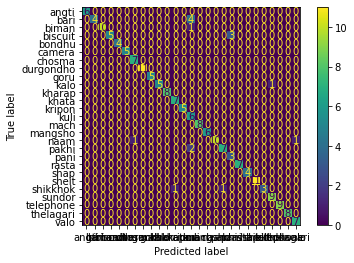

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# sns.heatmap(cm,annot=True)
labels = actions

# ax = sns.heatmap(cm, annot=True)
# ax.set_title("title")
# ax.xaxis.tick_top()
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels, rotation=0)

cm = confusion_matrix(ytrue, ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot().figure(figsize=(20,20))  
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.set_xticklabels(labels, rotation=45)

# plt.savefig("Confusion_Matrix.png")

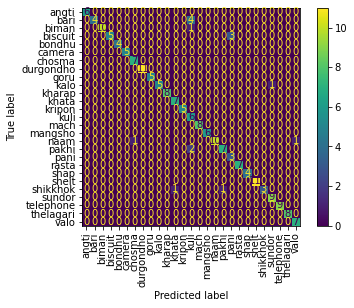

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# np.random.seed(0)
# y_true = np.random.randint(0,27, 100)
# y_pred = np.random.randint(0,27, 100)

labels = actions

cm = confusion_matrix(ytrue, ypred,)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(xticks_rotation = 'vertical')
#plt.savefig("Confusion_Matrix.png")

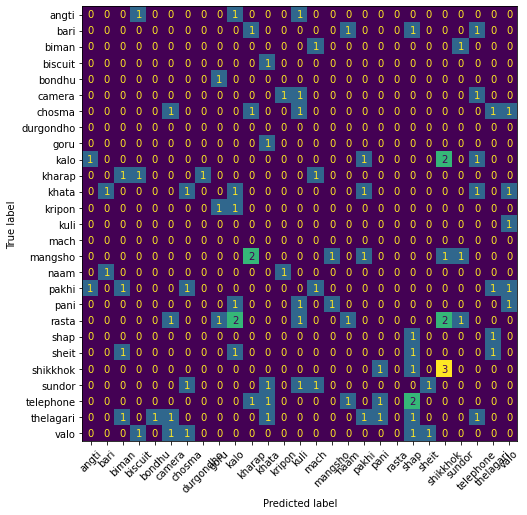

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# np.random.seed(0)

n = len(labels)
# y_true = np.random.randint(0,n, 100)
# y_pred = np.random.randint(0,n, 100)

# labels = [f'class_{i+1}' for i in range(n)]
labels = actions

fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(
            y_true, 
            y_pred, 
            display_labels = labels, 
            xticks_rotation=45,
            ax = ax, 
            colorbar = False)
